# Разработка плана мероприятий по снижению оттока клиентов фитнес-центра. 

## Оглавление

[1. Цель проекта](#1)

[2. Задачи](#2)

[3.Описание данных ](#3)

[4.Предварительный анализ данных ](#4)

[4.1.Загрузка библиотек и данных](#4.1)

[4.2. Предварительный анализ данных](#4.2)


[6. Исследовательский анализ](#6)

[6.1. Распределение целевой переменной по классам  ("ушли/остались") ](#6.1)

[6.2. Усредненные признаки](#6.2)

[6.3. Распределение признаков](#6.3)

[6.4. Корреляционная матрица](#6.4)

[6.5. Исследовательский анализ – выводы](#6.5)


[7. Модель прогнозирования оттока клиентов (задача классификации)](#7)

[7.1. Разделение данных на признаки и целевую переменную](#7.1)

[7.2. Разделение  модели на обучающую и валидационную выборку](#7.2)

[7.3. Стандартизация количественны признаков  в обучающих и валидационных выборках](#7.3)

[7.4. Логистическая регрессия](#7.4)

[7.5. “Случайный лес”](#7.5)

[7.6. Выбор модели ](#7.6)

[7.7. “Случайный лес” – важность признаков](#7.7)

[7.8. Задача классификации – основные выводы](#7.8)


[8. Кластеризация клиентов](#8)

[8.1. Стандартизация количественны признаков](#8.1)

[8.2. Анализ дендрограммы](#8.2)

[8.3. Кластеризация на основании алгоритма K-Means](#8.3)

[8.4. Доля оттока по кластерам](#8.4)

[8.5. Средние значения признаков по кластерам](#8.5)

[8.6. Распределение признаков](#8.6)

[8.7. Задача кластеризации – основные выводы ](#8.7)



[9. Применимость полученных результатов](#9)

[10. Общий вывод](#10)




























## 1. Цель проекта <a class="anchor" id="1"></a>


На основе анализа данных о клиентах подготовить план мероприятий  по снижению уровня их оттока. 



## 2. Задачи <a class="anchor" id="2"></a>

1.	Подготовить данные к работе;
2.	Провести их исследовательский анализ, сделать предположения о важности признаков;
3.	Решить задачу классификации, выбрать лучшую модель, определить степень важности признаков;
4.	Решить задачу кластеризации, сравнить значения признаков по кластерам, определить степень важности признаков;
5.	Исходя из полученных данных о важности признаков, предложить меры по снижению оттока клиентов. 






## 3. Описание данных <a class="anchor" id="3"></a>


1.	'Churn' — факт оттока в текущем месяце;
2.	'gender' — пол;
3.	'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
4.	'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
5.	Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
6.	'Phone' — наличие контактного телефона;
7.	'Age' — возраст;
8.	'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
9.	'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
10.	'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
11.	'Group_visits' — факт посещения групповых занятий;
12.	'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
13.	'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
14.	'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон






## 4. Предварительный анализ данных <a class="anchor" id="4"></a>

### 4.1.Загрузка библиотек и данных <a class="anchor" id="4.1"></a>

In [1]:
#!pip install pandas -U
#!pip install  seaborn -U
#!pip install  sklearn -U
#!pip install  scipy -U

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score


from scipy.cluster.hierarchy import dendrogram, linkage 


from sklearn.cluster import KMeans



In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# path = Данные Яндекс  Практикум

In [5]:
#data = pd.read_csv(path + 'gym_churn.csv') 


###  4.2. Предварительный анализ данных <a class="anchor" id="4.2"></a>

In [6]:
# консолидация исследовательких функций
def glance_down(df):
    display(df)
    df.info()
    display(df.describe())
    display(df.isnull().sum())
    print ('Дубликатов в таблице:', df.duplicated().sum())
    print(df.columns)

In [7]:
glance_down(data)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Дубликатов в таблице: 0
Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')


### 4.3. Предварительный анализ - выводы <a class="anchor" id="4.3"></a>

По результатам предварительного анализа можно заключить:
1.	все представленные в датасете данные имеют типы int или float;
2.	с точки зрения бизнеса и задач ML их можно разделить на бинарные ( наблюдается признак/ целевое значение или нет) и количественные ( какова величина признака в присущей ему непрерывной шкале – месяцы, рубли, частота за период и т.д.);
3.	данные типа int соответствуют бинарному типу, данные типа float – количественному;
4.	исходя из того, что в процессе работы надо будет решать задачи  ML классификации ( в т.ч. с использованием логистической регрессии) и кластеризации, количественные данные подлежат стандартизации. Во избежание путаницы, стандартизацию имеет смысл проводить непосредственно перед решением соответствующих задач ML;
5.в датасете нет временных переменных.  Данные не образуют временной ряд, при разделении их на обучающую и тестовые выборки для задач ML можно применять стандартный метод train_test_split() - random;
6.	в качестве рутинной задачи предподготовки данных можно определить приведение названия столбцов к нижнему регистру. 


## 5. Подготовка  данных <a class="anchor" id="5"></a>

In [8]:
data.rename(columns={'Near_Location': 'near_location', 'Partner': 'partner', \
        'Promo_friends': 'promo_friends',   'Phone': 'phone', 'Contract_period': 'contract_period', \
         'Group_visits': 'group_visits',   'Age': 'age', 'Avg_additional_charges_total': 'avg_additional_charges_total',\
         'Month_to_end_contract': 'month_to_end_contract',   'Age': 'age', 'Lifetime': 'lifetime', \
          'Avg_class_frequency_total': 'avg_class_frequency_total',\
          'Avg_class_frequency_current_month': 'avg_class_frequency_current_month', 'Churn': 'churn' }, inplace=True)

In [9]:
data.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Названия столбцов к нижнему регистру приведены. 

## 6. Исследовательский анализ <a class="anchor" id="6"></a>

### 6.1. Распределение целевой переменной по классам  ("ушли/остались") <a class="anchor" id="6.1"></a>

In [10]:
data_churn_share = data.groupby('churn').agg({'phone': 'count'})

In [11]:
data_churn_share['share'] = (data_churn_share['phone']/data_churn_share['phone'].sum()).round(2)

In [12]:
data_churn_share = data_churn_share.reset_index()

In [13]:
display(data_churn_share)

,churn,phone,share
0,0,2939,0.73
1,1,1061,0.27


In [14]:
data_churn_share.loc[data_churn_share['churn'] == 0, 'churn' ] = 'остались'
data_churn_share.loc[data_churn_share['churn'] == 1, 'churn' ] = 'ушли'

data_churn_share = data_churn_share.set_index('churn')

display(data_churn_share)

,phone,share
churn,,
остались,2939,0.73
ушли,1061,0.27


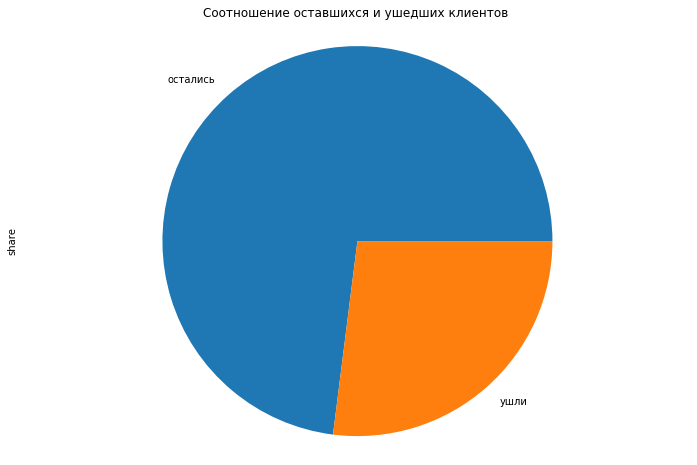

In [15]:
plt.figure(figsize=(12, 8))


plt.title('Соотношение оставшихся и ушедших клиентов')


data_churn_share['share'].plot(kind='pie', figsize=(12,8))


plt.axis('equal')
plt.show()



В анализируемом датесете доля оттока клиентов составляет ~  27%.

### 6.2. Усредненные признаки <a class="anchor" id="6.2"></a>

In [16]:
data_churn_mean = data.groupby('churn').mean()

In [17]:
display(data_churn_mean)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [18]:
data_churn_mean_t = data_churn_mean.T

In [19]:
display(data_churn_mean_t)

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Для того чтобы сделать первое и крайне грубое суждение о различии признаков по классам  целевой переменной( ‘ушли/остались’’) :
1.	по каждому признаку найдем модуль (abc) разницы между средними значениями признака по группам;
2.	пересчитаем получившуюся величину в долях от среднего  значения признака  по группе “остались”;
3.	визуализируем получившуюся картину.


In [20]:
data_churn_mean_t = data_churn_mean_t.reset_index()

In [21]:
data_churn_mean_t['delta'] = data_churn_mean_t[0]- data_churn_mean_t[1]

In [22]:
data_churn_mean_t['delta_abc'] = data_churn_mean_t['delta'].apply(abs)  

In [23]:
data_churn_mean_t['share'] = (data_churn_mean_t['delta_abc']/data_churn_mean_t[0]).round(3)

In [24]:
data_churn_mean_t = data_churn_mean_t.rename(columns={'index': 'fitcha'})

In [25]:
data_churn_mean_t = data_churn_mean_t.sort_values(by='share', ascending=False)

In [26]:
display(data_churn_mean_t)

churn,fitcha,0,1,delta,delta_abc,share
10,lifetime,4.711807,0.990575,3.721232,3.721232,0.790
5,contract_period,5.747193,1.728558,4.018635,4.018635,0.699
9,month_to_end_contract,5.283089,1.662582,3.620507,3.620507,0.685
12,avg_class_frequency_current_month,2.027882,1.044546,0.983336,0.983336,0.485
3,promo_friends,0.353522,0.183789,0.169733,0.169733,0.480
6,group_visits,0.464103,0.268615,0.195489,0.195489,0.421
2,partner,0.534195,0.355325,0.178870,0.178870,0.335
8,avg_additional_charges_total,158.445715,115.082899,43.362816,43.362816,0.274
11,avg_class_frequency_total,2.024876,1.474995,0.549881,0.549881,0.272
1,near_location,0.873086,0.768143,0.104943,0.104943,0.120


In [27]:
def bar_1(data, parametr):
    
    title  = parametr[0]
    x = parametr[1]
    y = parametr[2]
    
    xx = parametr[3]
    yy = parametr[4]
    
    plt.figure(figsize=(12, 8))
    plt.title(title)
    
    ax = sns.barplot(x=xx, y=yy, data=data)
                     
    ax.set_xlabel(x)
    ax.set_ylabel(y)

    ax.xaxis.grid(True)                 


In [28]:
paramentrs_1 = ['Различие в значениях признаков усредненных по группам ', 'Различие между группой churn = 0 и группой churn = 0 в долях от churn = 0 ', \
          'Признаки', 'share', 'fitcha']

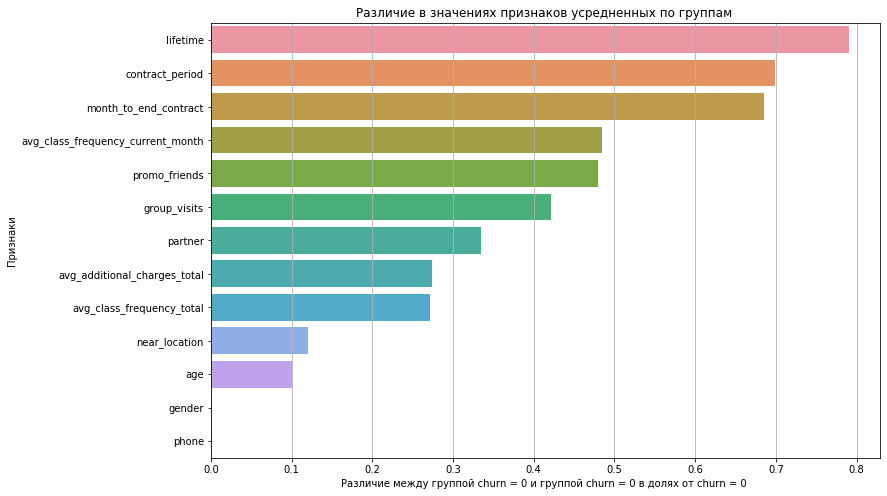

In [29]:
bar_1(data_churn_mean_t, paramentrs_1)

“Top 5” признаков имеющих максимальные отличия по группам:
1.	lifetime' — время с момента первого обращения в фитнес-центр;
2.	contract_period - длительность текущего действующего абонемента;
3.	month_to_end_contract - срок до окончания текущего действующего абонемента (в месяцах);
4.	'avg_class_frequency_current_month'  - средняя частота посещений в неделю за предыдущий месяц;
5.	promo_friends - факт первоначальной записи в рамках акции «приведи друга».

Признаки,  слабо отличающиеся по группам:
1.	gender— пол;
2.	near_location— проживание или работа в районе, где находится фитнес-центр;
3.	phone— наличие контактного телефона;
4.	age— возраст,


### 6.3. Распределение признаков <a class="anchor" id="6.3"></a>

In [30]:
data_churn_0 = data[data['churn']==0]

In [31]:
data_churn_1 = data[data['churn']==1]

Для визуального исследования различия в распределениях признаков , представляется удобным использовать наложенные друг на друга гистограммы. 

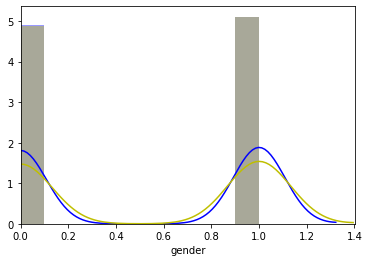

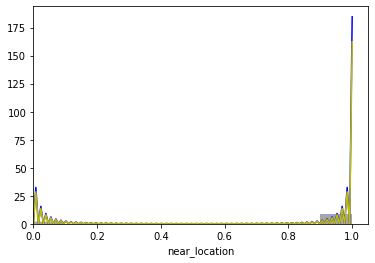

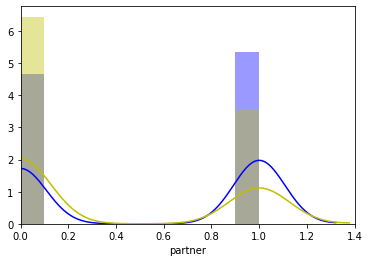

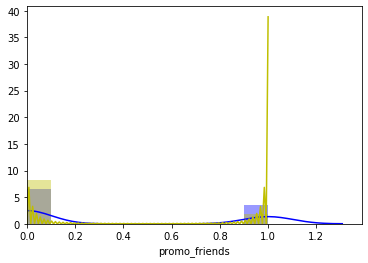

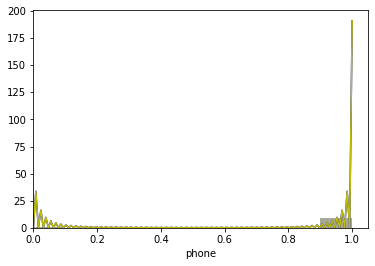

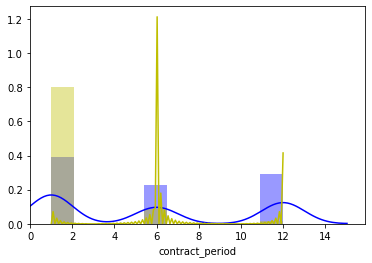

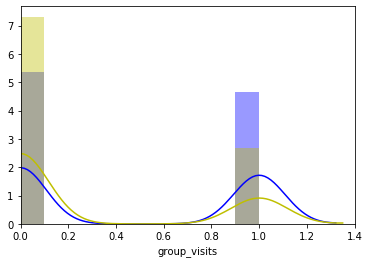

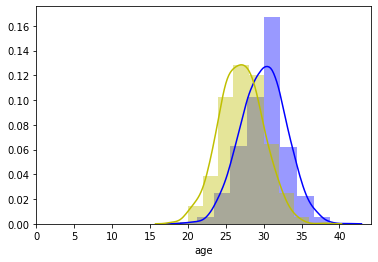

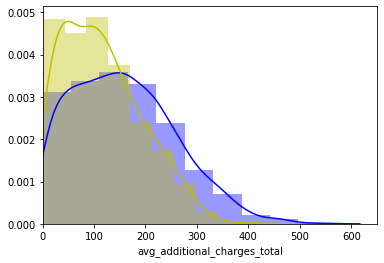

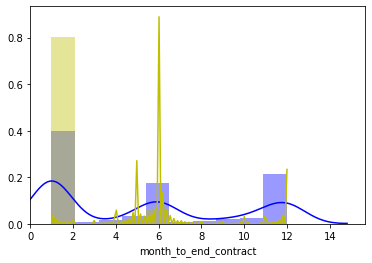

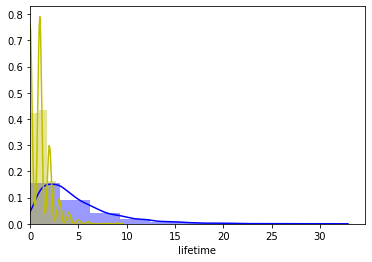

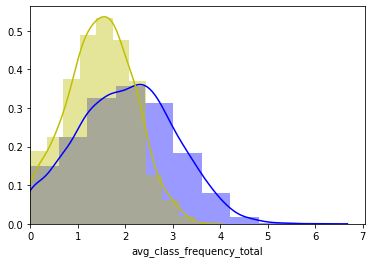

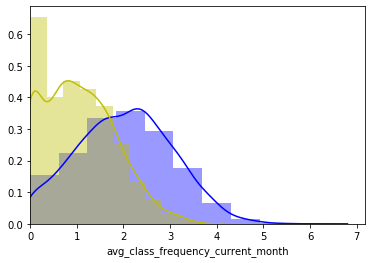

In [32]:
for col in data_churn_0.drop('churn', axis = 1).columns:
    #sns.histplot(data_churn_0[col], bins=10, alpha =0.4, color = 'g')
    #sns.histplot(data_churn_1[col], bins=10)
    
    sns.distplot(data_churn_0[col], bins=10,   color = 'b').set(xlim=(0))
    sns.distplot(data_churn_1[col], bins=10, color = 'y').set(xlim=(0))
    
    plt.show()

    

На основе анализа улучшенной визуализации можно заключить:
1.	признак gender   - визуально затруднительно найти разницу по группам;
2.	признак near_location – визуально затруднительно найти разницу по группам ;
3.	признак partner –  в группе ушедших клиентов меньшая доля людей   занимавшихся по партнерским программам;
4.	признак promo friends - в группе ушедших клиентов меньшая доля людей   которых привели другие клиенты;
5.	признак phone – визуально затруднительно найти разницу по группам;
6.	признак contract period – в группе ушедших клиентов подавляющее большинство имели короткие сроки контрактов ;
7.	признак group visits  -  в группе ушедших клиентов меньшая доля людей   ходила на групповые тренировки;
8.	признак age – у людей оставшихся в клубе немного больший средний и медианный возраст.  В целом функция распределения смещена вправо;
9.	avg_additional_charges_total - у людей оставшихся в клубе больше среднее и медианное значение признака.  В целом,  левая сторона функции распределения более пологая – больше возрастных клиентов ;
10.	month_to_end_contract – в группе ушедших клиентов у подавляющего большинства контракты подходили к концу;
11.	lifetime - в группе ушедших клиентов подавляющее большинство занималось короткое время;
12.	avg_class_frequency_total - у людей оставшихся в клубе больше среднее и медианное значение признака.  В целом , левая сторона функции распределения более пологая – многие чаще ходят;
13.	avg_class_frequency_current_month – тоже самое что и предыдущий признак, только разница гораздо заметнее 



### 6.4. Корреляционная матрица  <a class="anchor" id="6.4"></a>

In [33]:
cm =  data.corr()  

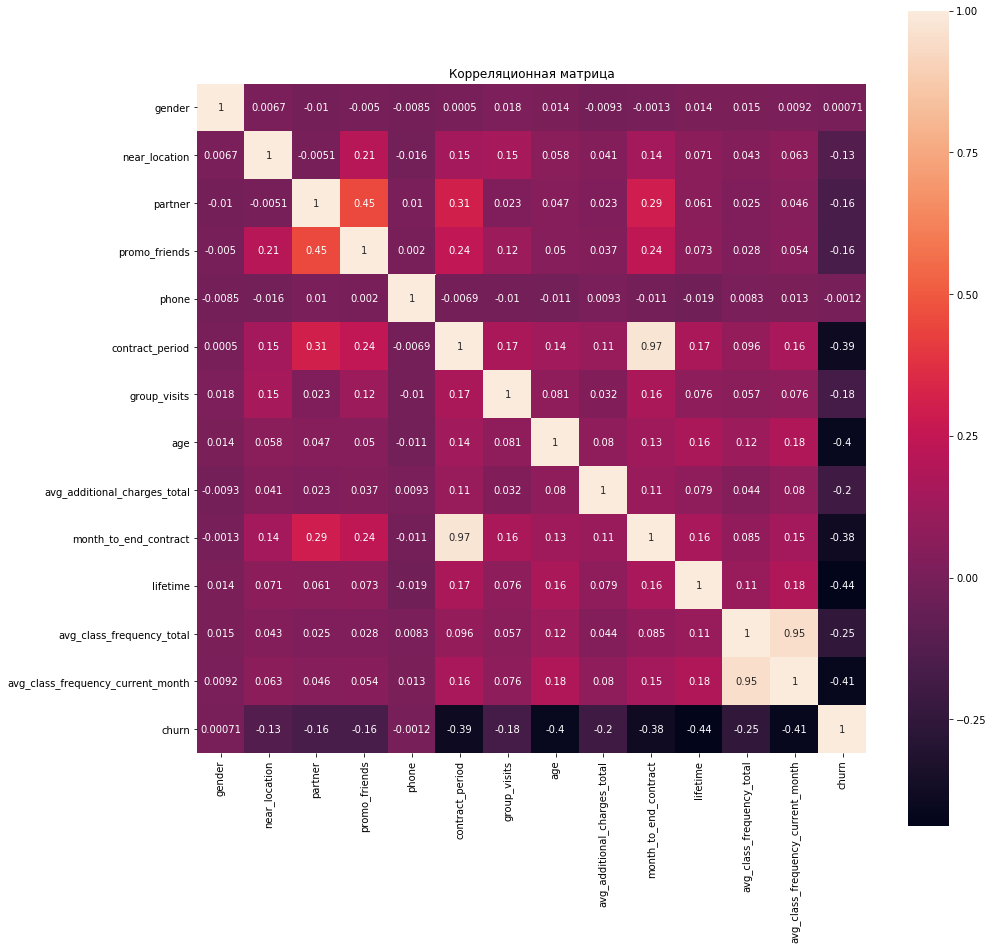

In [34]:
plt.figure(figsize=(15, 15))

plt.title('Корреляционная матрица')

sns.heatmap(cm, annot = True, square=True)



plt.show()


С churn наиболее сильно связанны признаки (top 5, коэффициенты Пирсона ):
1.	lifetime'  (время с момента первого обращения в фитнес-центр) =  –  0.44;
2.	'avg_class_frequency_current_month'  - суммарная выручка от других услуг фитнес-центра: кафе = -0.41;
3.	contract_period - длительность текущего действующего абонемента = - 0.39;
4.	month_to_end_contract - срок до окончания текущего действующего абонемента (в месяцах) = - 0.38;
5.	avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента = -0.25,


Выявлена сильная связь между признаками (коэффициенты Пирсона):
1.	month_to_end_contract и contract_period = 0.97;
2.	'avg_class_frequency_current_month'  и avg_class_frequency_total'  = 0.95.


###  6.5. Исследовательский анализ – выводы <a class="anchor" id="6.5"></a>

Соотношение ушедших и оставшихся клиентов в датасете ( ~ 30 на 70). С точки зрения ML – выборка несбалансирвоанная. 

Классы целевой переменной очень слабо различаются  по признакам:
1.	gender— пол;
2.	near_location— проживание или работа в районе, где находится фитнес-центр;
3.	phone— наличие контактного телефона;
4.	age— возраст,


Наиболее сильное различие по усредненным значениям признаков:
1.	lifetime' — время с момента первого обращения в фитнес-центр;
2.	contract_period - длительность текущего действующего абонемента;
3.	month_to_end_contract - срок до окончания текущего действующего абонемента (в месяцах);
4.	'avg_class_frequency_current_month'  - средняя частота посещений в неделю за предыдущий месяц;
5.	promo_friends - факт первоначальной записи в рамках акции «приведи друга».


Корреляционный анализ выявил наиболее сильную связь между значением целевой переменной и признаками:
1.	lifetime'  (время с момента первого обращения в фитнес-центр) =  –  0.44;
2.	'avg_class_frequency_current_month'  - суммарная выручка от других услуг фитнес-центра: кафе = -0.41;
3.	contract_period - длительность текущего действующего абонемента = - 0.39;
4.	month_to_end_contract - срок до окончания текущего действующего абонемента (в месяцах) = - 0.38;
5.	avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента = -0.25,

Выявлены сильные корреляции между признаками:
1.	month_to_end_contract и contract_period = 0.97;
2.	'avg_class_frequency_current_month'  и avg_class_frequency_total'  = 0.95.

Если бы предстояло решать задачу линейной регрессии, их необходимо было бы дополнительно обработать. 



## 7. Модель прогнозирования оттока клиентов (задача классификации)<a class="anchor" id="7"></a>

### 7.1. Разделение данных на признаки и целевую переменную <a class="anchor" id="7.1"></a>

In [35]:
X = data.drop('churn', axis=1)
y = data['churn']


### 7.2. Разделение  модели на обучающую и валидационную выборку <a class="anchor" id="7.2"></a>

Т.к. данные относятся к одному периоду, используем стандартный метод разделения. 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


### 7.3. Стандартизация количественны признаков  в обучающих и валидационных выборках <a class="anchor" id="7.3"></a>

In [37]:
scaler = StandardScaler()
scaler.fit(
X_train[[ 'contract_period',  'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month']]
)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
X_train_st = X_train.copy()


X_train_st[[ 'contract_period',  'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',\
         'avg_class_frequency_total', 'avg_class_frequency_current_month']] = \
 scaler.transform(X_train[[ 'contract_period',  'age',\
                             'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',\
      'avg_class_frequency_total', 'avg_class_frequency_current_month']])




In [39]:
display(X_train_st)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
1161,0,1,1,1,1,1.605030,0,0.579448,0.371617,1.591738,1.127350,1.755804,1.618228
2355,0,1,0,0,1,-0.812991,0,0.270461,-1.096974,-0.795682,5.881383,-0.223967,-0.013409
1831,1,1,1,0,1,1.605030,0,-0.656502,-1.183742,1.830480,0.335011,-0.843085,-0.805412
156,0,1,1,1,1,0.286110,0,-0.965489,-0.951588,0.398028,1.391463,0.667714,0.646052
195,0,1,0,0,0,-0.812991,0,-0.038527,0.971904,-0.795682,0.070898,-0.195879,-0.160381
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0,0,0,0,0,-0.812991,0,0.579448,-0.077604,-0.795682,-0.193215,0.229154,0.360074
3264,1,1,1,1,0,1.605030,1,1.506410,0.873643,1.352996,1.391463,-0.565432,-0.464825
1653,0,1,0,0,1,-0.812991,0,-1.274477,0.327429,-0.795682,-0.193215,-0.773483,-0.576688
2607,1,1,0,0,1,-0.812991,1,-0.347514,-1.435833,-0.795682,-0.457328,0.040813,-0.025787


In [40]:
X_test_st = X_test.copy()

X_test_st[[ 'contract_period',  'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',\
         'avg_class_frequency_total', 'avg_class_frequency_current_month']] = \
 scaler.transform(X_test[[ 'contract_period',  'age',\
                             'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',\
      'avg_class_frequency_total', 'avg_class_frequency_current_month']])




In [41]:
display(X_test_st)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
2230,0,1,1,1,1,1.605030,1,-0.038527,1.165334,1.830480,-0.457328,0.479757,0.529234
668,0,0,0,0,1,-0.812991,1,-0.656502,-1.019538,-0.795682,-0.985554,-0.901621,-0.980914
3616,0,0,1,0,1,0.286110,0,0.270461,-1.260915,0.159286,-0.457328,-1.932126,-1.670535
2363,1,1,0,0,1,-0.812991,1,-0.656502,-0.075263,-0.795682,-0.985554,0.453015,0.070034
142,1,0,1,0,0,1.605030,0,-0.038527,-0.591965,1.830480,-0.721441,1.684929,1.518304
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,1,1,0,0,1,-0.812991,0,0.270461,-1.084551,-0.795682,-0.721441,-0.366989,-0.352304
3572,0,1,1,1,1,-0.812991,0,-0.038527,0.619755,-0.795682,0.070898,0.144246,0.003893
2482,1,1,0,0,1,-0.812991,1,-0.038527,0.978623,-0.795682,-0.721441,0.729611,0.814145
643,0,1,1,0,0,1.605030,1,-0.038527,-0.722264,1.830480,1.655576,-1.141891,-0.837103


### 7.4. Логистическая регрессия <a class="anchor" id="7.4"></a>

In [42]:
def print_metrics(y_true, y_pred, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    


In [43]:
lr_model = LogisticRegression(random_state=0)

In [44]:
lr_model.fit(X_train_st, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
lr_predictions = lr_model.predict(X_test_st)

In [46]:
print_metrics(
    y_test,
    lr_predictions,
    title='Метрики для модели логистической регрессии:',
)


Метрики для модели логистической регрессии:
	Accuracy: 0.93
	Precision: 0.86
	Recall: 0.83


На этапе исследовательского анализа было установлено, что данные датасета являются несбалансированными. Имеет смысл попытаться ввести в модель кастомный порог.

In [47]:
threshold = 0.3

In [48]:
probabilities = lr_model.predict_proba(X_test_st)[:, 1]

In [49]:
lr_correct_predictions = [0 if i < threshold else 1 for i in probabilities]

In [50]:
print_metrics(
    y_test,
    lr_correct_predictions ,
    title='Метрики для модели логистической регрессии с кастомным порогом:',
)

Метрики для модели логистической регрессии с кастомным порогом:
	Accuracy: 0.91
	Precision: 0.78
	Recall: 0.89


###  7.5. “Случайный лес” <a class="anchor" id="7.5"></a>

In [51]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)  

In [52]:
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [53]:
rf_predictions = rf_model.predict(X_test_st) 

In [54]:
print_metrics(
    y_test,
    rf_predictions,
    title = 'Метрики для модели случайного леса:'
)


Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


И опять расчеты с кастомным порогом. 

In [55]:
probabilities_rf = rf_model.predict_proba(X_test_st)[:, 1]

In [56]:
rf_correct_predictions = [0 if i < threshold else 1 for i in probabilities_rf]

In [57]:
print_metrics(
    y_test,
    rf_correct_predictions,
    title = 'Метрики для модели случайного леса с кастомным порогом:'
)

Метрики для модели случайного леса с кастомным порогом:
	Accuracy: 0.90
	Precision: 0.74
	Recall: 0.93


### 7.6. Выбор модели  <a class="anchor" id="7.6"></a>

Доли правильных ответов (Accuracy) примерно ровны по всем моделям. 

По доли правильных ответов среди целевого класса ( Precision) лидером является логистическая регрессия без кастомного порога.

По доли реально обнаруженных объектов класса 1 (Recall) лидер – “случайный лес” с кастомным порогом. 

Представляется, что для бизнеса наибольший интерес представляет метрика Recall –  “группу риска”  лучше сделать побольше. 
Соответственно,  в качестве рабочей модели будем использовать “случайный лес” с кастомным порогом.


### 7.7. “Случайный лес” – важность признаков <a class="anchor" id="7.7"></a>

Интересно посмотреть какие признаки оказались наиболее важными  для выбранной модели. 

In [58]:
rf_feature = \
pd.DataFrame(
        data={'feature': X.columns, 'importance': rf_model.feature_importances_}\
).sort_values(by='importance', ascending=False)


In [59]:
rf_feature['importance'] = rf_feature['importance'].round(2)

In [60]:
display(rf_feature)

,feature,importance
10,lifetime,0.28
12,avg_class_frequency_current_month,0.18
11,avg_class_frequency_total,0.13
7,age,0.12
8,avg_additional_charges_total,0.09
9,month_to_end_contract,0.07
5,contract_period,0.07
6,group_visits,0.02
0,gender,0.01
2,partner,0.01


In [61]:
paramentrs_5 = ['Значимость признаков в модели “случайный лес” ', 'Значимость', \
          'Признаки', 'importance', 'feature']

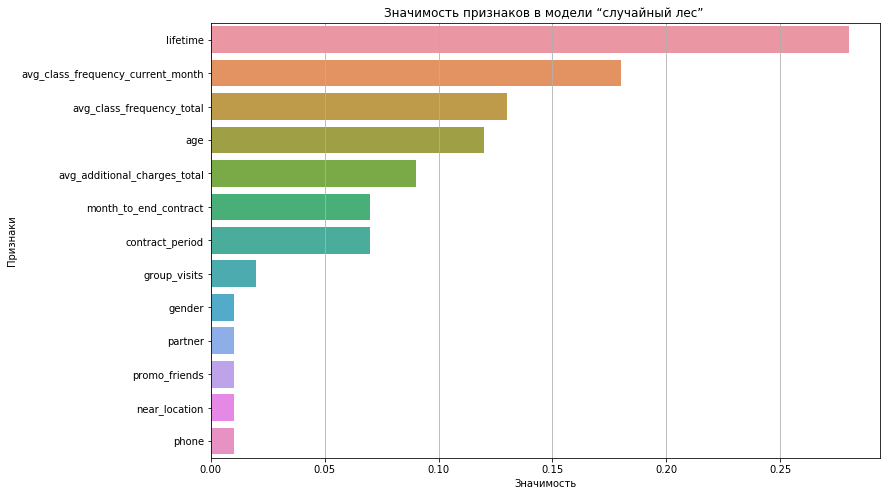

In [62]:
bar_1(rf_feature, paramentrs_5)

В top 5 вошли:
1.	lifetime;
2.	avg_class_frequency_current_month;
3.	avg_class_frequency_total;
4.	age;
5.	avg_additional_charges_total.

Неожиданностью, кончено, является признак age. На стадии грубых оценок его значимость была совсем не видна.


### 7.8. Задача классификации – основные выводы <a class="anchor" id="7.8"></a>

Для решения задачи классификации использовались модели – логистическая регрессия и случайный лес. 

Т.к. исходный датасет был несбалансированным, для обеих моделей так же производились расчеты с кастомным порогом ( 0,3). Итого – 4 варианта.

По совокупности метрик Accuracy, Precision, Recall явного победителя среди четырех вариантов выбрать было нельзя.

Исходя из бизнес контекста в качестве основной была выбрана метрика Recall (хотим определять максимально широкую группу риска).  В результате наиболее перспективной была признана модель “случайный лес” с кастомным порогом. 

Наиболее важными признаками для модели оказались : lifetime, avg_class_frequency_current_month. avg_class_frequency_total, age, avg_additional_charges_total.

Высокая важность признака age оказалась неожиданным результатом.  На этапе исследовательского анализа, age выглядел как очень слабо различающийся по классам признак. 



## 8. Кластеризация клиентов <a class="anchor" id="8"></a>

### 8.1. Стандартизация количественны признаков <a class="anchor" id="8.1"></a>

In [63]:
sc = StandardScaler()

In [64]:
X_sc = X.copy()

In [65]:
X_sc[[ 'contract_period',  'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',\
         'avg_class_frequency_total', 'avg_class_frequency_current_month']] =\
     sc.fit_transform(
  X[[ 'contract_period',  'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',\
         'avg_class_frequency_total', 'avg_class_frequency_current_month']] 

)




In [66]:
display(X_sc)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,1,1,1,1,0,0.289890,1,-0.056554,-1.377531,0.161605,-0.193329,-1.911920,-1.678472
1,0,1,0,0,1,1.608822,1,0.557327,-0.350213,1.831941,0.873680,0.045176,0.136014
2,0,1,1,0,1,-0.809219,0,-0.363494,-0.181592,-0.792873,-0.460081,-0.020493,-0.029019
3,0,1,1,1,1,1.608822,1,1.171208,-0.874722,1.831941,-0.460081,1.364655,1.510450
4,1,1,1,1,1,-0.809219,0,-0.977375,0.533700,-0.792873,-0.193329,-0.787076,-0.614542
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,1.608822,0,1.171208,-1.500232,1.831941,1.140432,0.417105,0.552842
3996,0,1,0,0,1,-0.809219,1,-0.056554,-0.810225,-0.792873,-0.726833,-0.619110,-1.400294
3997,1,1,1,1,1,1.608822,0,-0.363494,-0.713002,1.593322,-0.460081,0.933139,1.011031
3998,0,1,1,1,1,0.289890,0,0.864268,-0.882582,0.161605,-0.193329,-0.256049,-0.162252


### 8.2. Анализ дендрограммы <a class="anchor" id="8.2"></a>

In [67]:
linked = linkage(X_sc, method = 'ward')

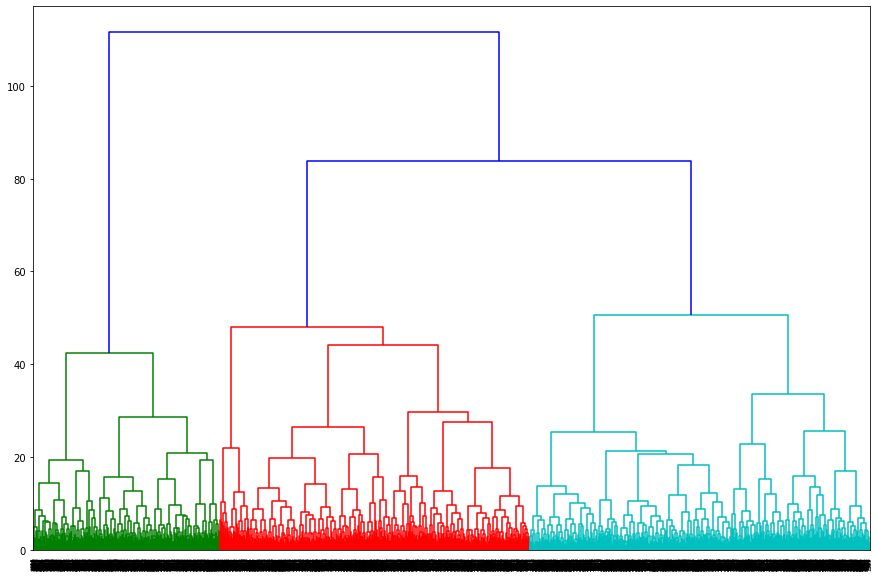

In [68]:
plt.figure(figsize=(15, 10)) 
dendrogram(linked, orientation='top')
plt.show() 


Исходя из построенной дендаграммы, можно выделить от 4 до 7 кластеров. Для  дальнейшей работы примем число кластеров равное 5.  

### 8.3. Кластеризация на основании алгоритма K-Means <a class="anchor" id="8.3"></a>

In [69]:
km =  KMeans(n_clusters = 5, random_state=0)

In [70]:
labels = km.fit_predict(X_sc) 

In [71]:
data['cluster'] = labels

### 8.4. Доля оттока по кластерам <a class="anchor" id="8.4"></a>

In [72]:
data_cluster_churn = data.groupby('cluster').agg({'churn': 'mean', 'gender' : 'count'}).reset_index()\
    .sort_values(by='churn', ascending=False)

In [73]:
data_cluster_churn = data_cluster_churn.rename(columns={'gender': 'clients', 'churn': 'churn_share'})

In [74]:
data_cluster_churn['churn_share']= data_cluster_churn['churn_share'].round(2)

In [75]:
data_cluster_churn['lost_clients'] =( data_cluster_churn['clients']*data_cluster_churn['churn_share']).round()

In [76]:
# data_cluster_churn['cluster'] = data_cluster_churn['cluster'].astype(str)

data_cluster_churn.loc[data_cluster_churn['cluster'] == 0, 'cluster' ] = 'Кластер 0'
data_cluster_churn.loc[data_cluster_churn['cluster'] == 1, 'cluster' ] = 'Кластер 1'
data_cluster_churn.loc[data_cluster_churn['cluster'] == 2, 'cluster' ] = 'Кластер 2'
data_cluster_churn.loc[data_cluster_churn['cluster'] == 3, 'cluster' ] = 'Кластер 3'
data_cluster_churn.loc[data_cluster_churn['cluster'] == 4, 'cluster' ] = 'Кластер 4'





In [77]:
display(data_cluster_churn)

,cluster,churn_share,clients,lost_clients
3,Кластер 3,0.63,1408,887.0
1,Кластер 1,0.11,1066,117.0
0,Кластер 0,0.07,655,46.0
4,Кластер 4,0.01,574,6.0
2,Кластер 2,0.00,297,0.0


In [78]:
paramentrs_2 = ['Доля оттока клиентов по кластерам', 'Отток клиентов ( доля от общего количества в кластере)', \
          'Кластеры', 'churn_share', 'cluster']

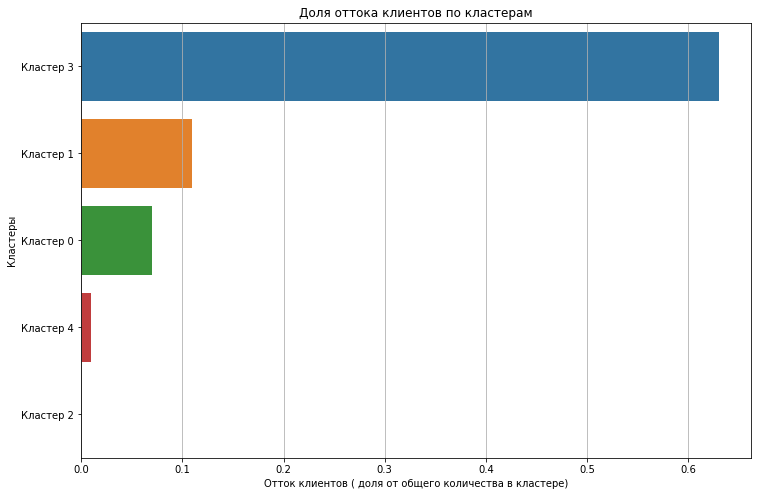

In [79]:
bar_1(data_cluster_churn, paramentrs_2)

Наибольший отток наблюдается у клиентов входящих в кластер 3 (наиболее ненадежный кластер). Наименьший отток наблюдается в кластере 2. 

### 8.5. Средние значения признаков по кластерам <a class="anchor" id="8.5"></a>

In [80]:
data_cluster_mean = data.groupby('cluster').mean().sort_values(by='churn', ascending=False).T.reset_index()

In [81]:
display(data_cluster_mean)

cluster,index,3,1,0,4,2
0,gender,0.494318,0.523452,0.534351,0.487805,0.528620
1,near_location,0.776989,0.843340,0.908397,0.930314,0.872054
2,partner,0.360795,0.419325,0.674809,0.724739,0.451178
3,promo_friends,0.193892,0.284240,0.444275,0.486063,0.296296
4,phone,0.906960,0.907129,0.897710,0.916376,0.861953
5,contract_period,1.326705,2.651970,9.297710,12.000000,3.542088
6,group_visits,0.311790,0.410882,0.494656,0.541812,0.461279
7,age,27.726562,30.056285,29.912977,29.893728,29.986532
8,avg_additional_charges_total,123.837928,156.961705,166.043641,162.256139,148.809168
9,month_to_end_contract,1.269176,2.539400,8.610687,10.804878,3.215488


Для того, чтобы более четко увидеть различии в средних значениях признаков по кластерам воспользуемся тем же критерием который применялся на этапе исследовательского анализа данных ( см. выше).

 Критерий построим для 2 пар. Пара 1 -   кластер 2 и кластер 3 , как наиболее различающиеся по уровню оттока. Пара 2 - -   кластер 1 и кластер 3, как наиболее близкие по уровню оттока. 


In [82]:
data_cluster_mean['delta_2_3'] = ((data_cluster_mean[2]-data_cluster_mean[3])/data_cluster_mean[2]).round(2)

In [83]:
 data_cluster_mean['delta_2_3'] =data_cluster_mean['delta_2_3'].apply(abs)  

In [84]:
data_cluster_mean['delta_1_3'] = ((data_cluster_mean[1]-data_cluster_mean[3])/data_cluster_mean[1]).round(2)

In [85]:
data_cluster_mean['delta_1_3'] =data_cluster_mean['delta_1_3'].apply(abs)

In [86]:
display(data_cluster_mean.sort_values(by='delta_2_3', ascending=False))

cluster,index,3,1,0,4,2,delta_2_3,delta_1_3
13,churn,0.632102,0.106004,0.074809,0.013937,0.003367,186.73,4.96
10,lifetime,1.824574,3.426829,3.480916,4.614983,12.619529,0.86,0.47
5,contract_period,1.326705,2.651970,9.297710,12.000000,3.542088,0.63,0.50
9,month_to_end_contract,1.269176,2.539400,8.610687,10.804878,3.215488,0.61,0.50
12,avg_class_frequency_current_month,0.993216,2.772674,0.964628,2.663431,1.863460,0.47,0.64
3,promo_friends,0.193892,0.284240,0.444275,0.486063,0.296296,0.35,0.32
6,group_visits,0.311790,0.410882,0.494656,0.541812,0.461279,0.32,0.24
11,avg_class_frequency_total,1.285056,2.785268,0.996424,2.671645,1.856706,0.31,0.54
2,partner,0.360795,0.419325,0.674809,0.724739,0.451178,0.20,0.14
8,avg_additional_charges_total,123.837928,156.961705,166.043641,162.256139,148.809168,0.17,0.21


Визуализируем результат для пары кластер 2 и кластер 3.

In [87]:
data_cluster_mean_2 = data_cluster_mean[data_cluster_mean['index'] != 'churn'].sort_values(by='delta_2_3', ascending=False)

In [88]:
display(data_cluster_mean_2)

cluster,index,3,1,0,4,2,delta_2_3,delta_1_3
10,lifetime,1.824574,3.426829,3.480916,4.614983,12.619529,0.86,0.47
5,contract_period,1.326705,2.651970,9.297710,12.000000,3.542088,0.63,0.50
9,month_to_end_contract,1.269176,2.539400,8.610687,10.804878,3.215488,0.61,0.50
12,avg_class_frequency_current_month,0.993216,2.772674,0.964628,2.663431,1.863460,0.47,0.64
3,promo_friends,0.193892,0.284240,0.444275,0.486063,0.296296,0.35,0.32
6,group_visits,0.311790,0.410882,0.494656,0.541812,0.461279,0.32,0.24
11,avg_class_frequency_total,1.285056,2.785268,0.996424,2.671645,1.856706,0.31,0.54
2,partner,0.360795,0.419325,0.674809,0.724739,0.451178,0.20,0.14
8,avg_additional_charges_total,123.837928,156.961705,166.043641,162.256139,148.809168,0.17,0.21
1,near_location,0.776989,0.843340,0.908397,0.930314,0.872054,0.11,0.08


In [89]:
paramentrs_3 = ['Различие в значениях признаков усредненных по кластерам 2 и 3',\
                'Различие между кластером 2  и кластером 3 в долях от кластера 2', \
          'Признаки', 'delta_2_3', 'index']

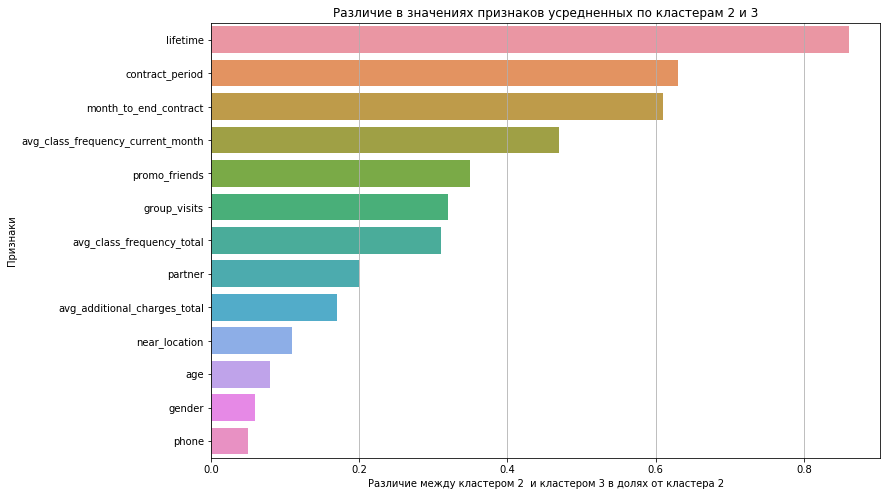

In [90]:
bar_1(data_cluster_mean_2, paramentrs_3)

В top 5 вошли:
1.	lifetime;
2.	contract_period;
3.	month_to_end_contract;
4.	avg_class_frequency_current_month;
5.	promo_friends.

### 8.6. Распределение признаков <a class="anchor" id="8.6"></a>

In [91]:
display(data)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,4
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,4
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0,4
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1,3
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0,4
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0,0


<div class="alert alert-info">


 Делаю новую визуализацию распределения признаков по кластерам. 

</div>

In [92]:

data_bin = data[['gender',  'near_location',  'partner',  'promo_friends', 'phone',  'group_visits',  'cluster' ]]

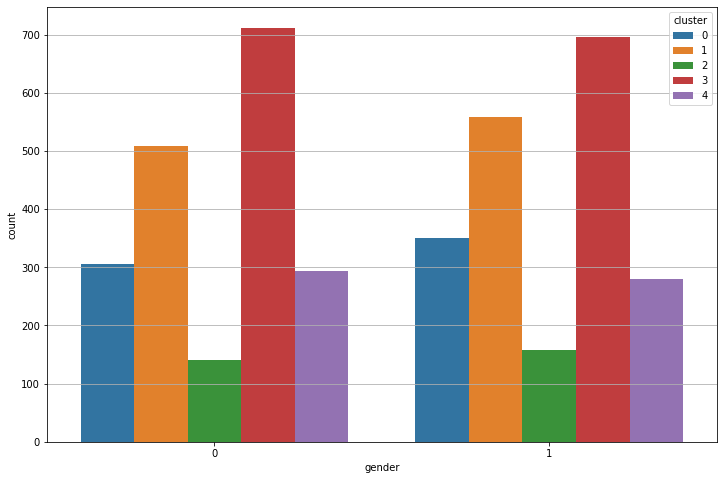

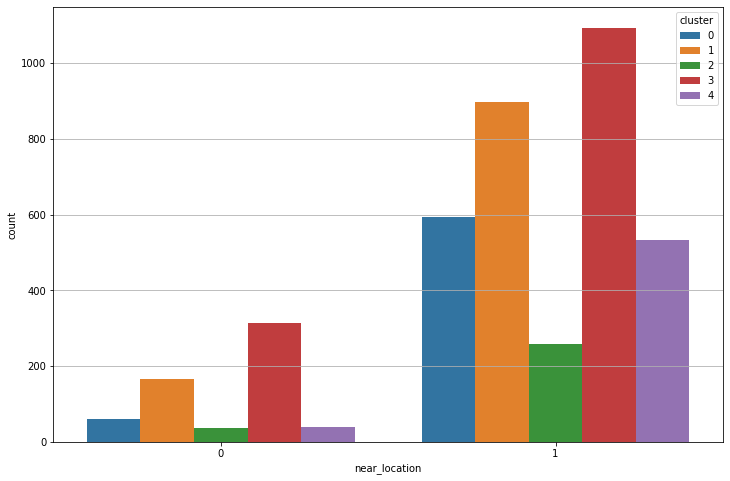

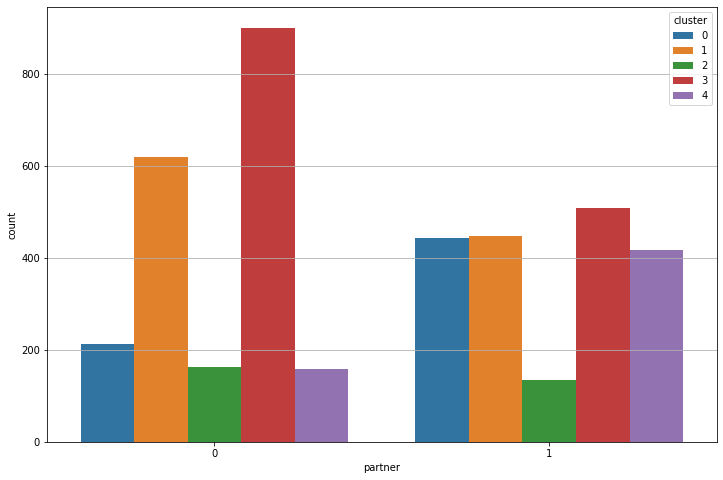

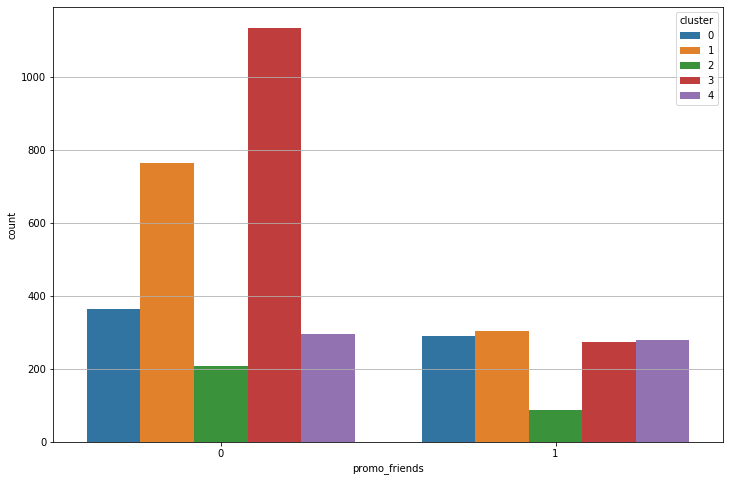

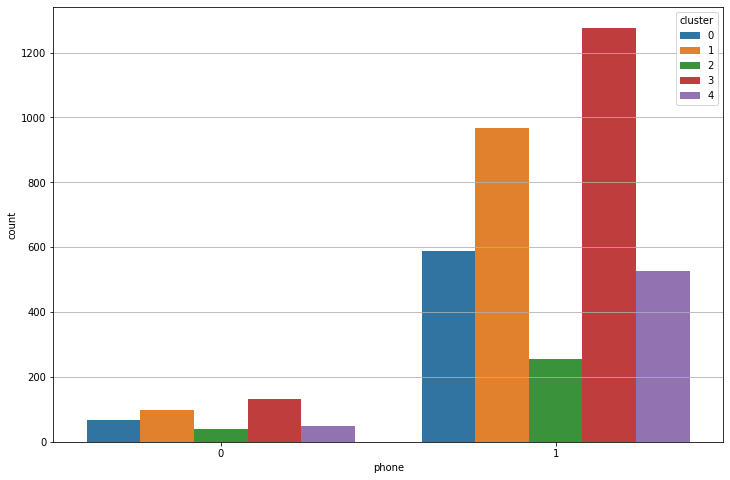

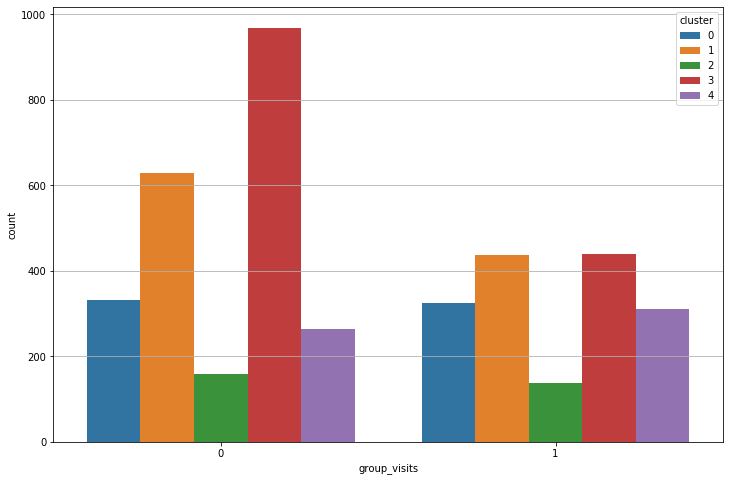

In [93]:
for col in data_bin.drop({'cluster'}, axis = 1).columns:
   
    plt.figure(figsize=(12, 8))  
    ax = sns.countplot(data = data_bin, x = col, hue = 'cluster')
    ax.yaxis.grid(True)
    


In [94]:
data_float = data[['contract_period', 'age', 'avg_additional_charges_total', \
    'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'cluster']]

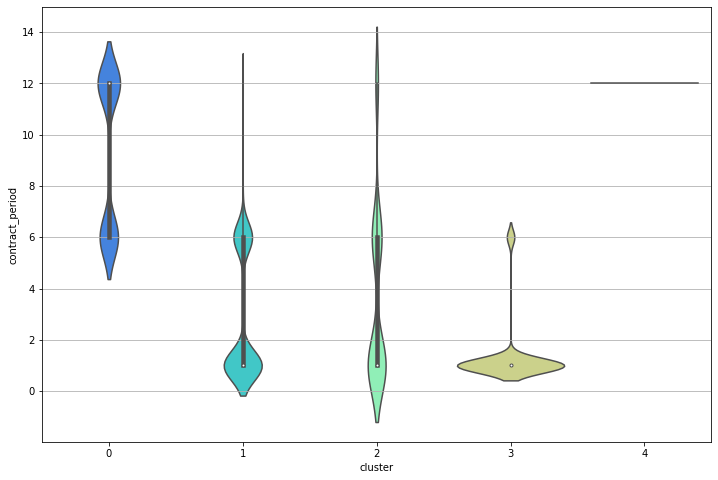

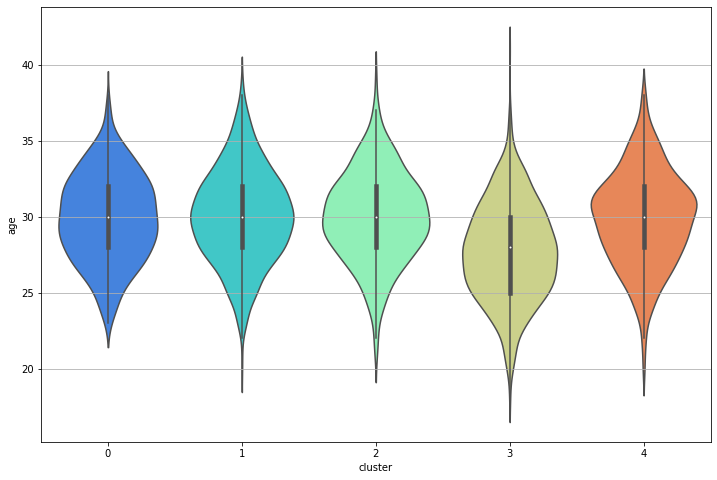

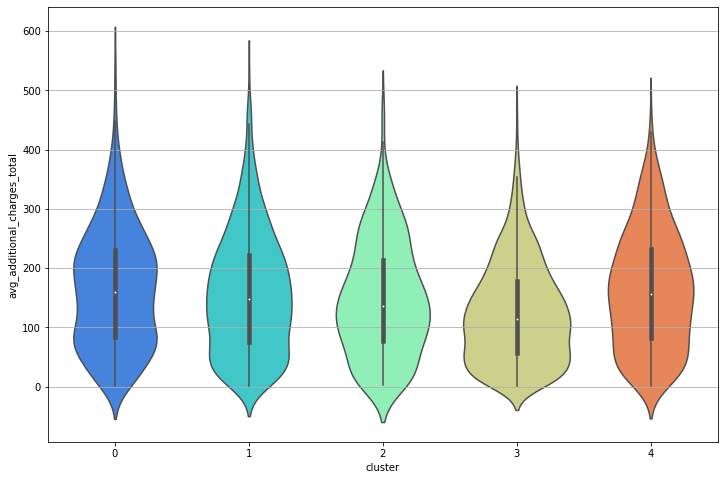

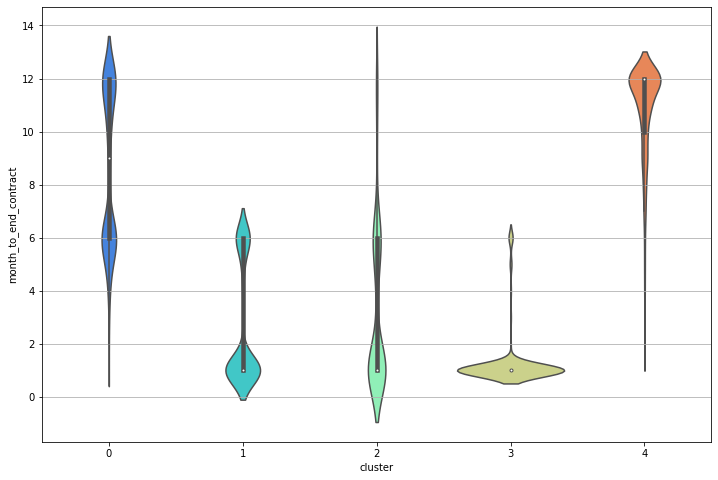

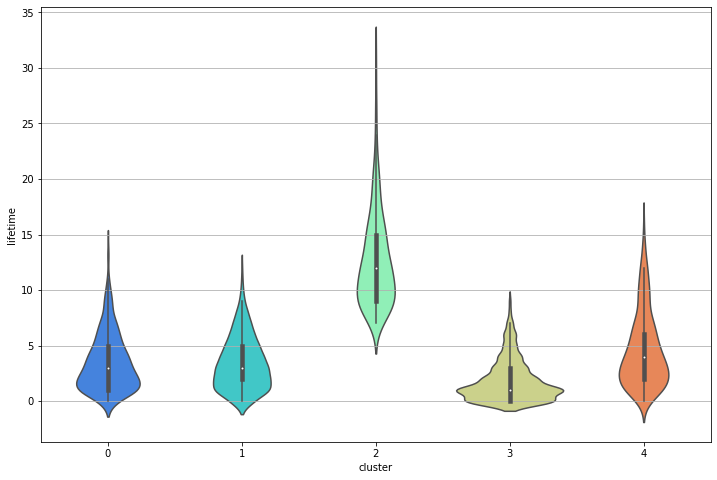

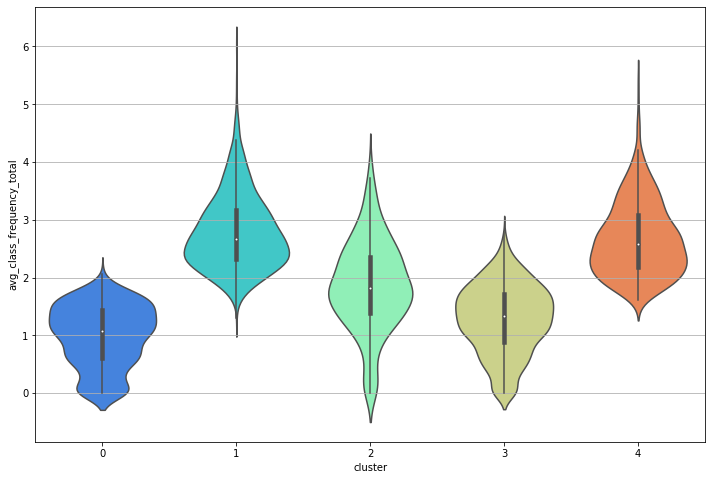

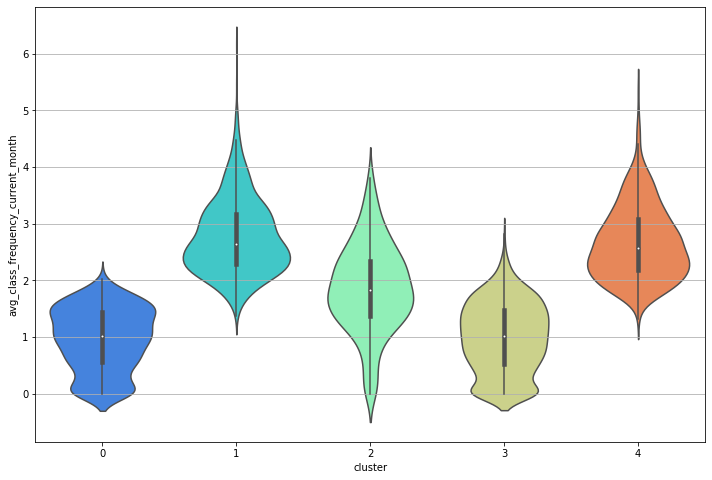

In [95]:
for col in data_float.drop({'cluster'}, axis = 1).columns:

    plt.figure(figsize=(12, 8))  

    ax = sns.violinplot(x='cluster', y=col , data=data_float , palette='rainbow')

    ax.yaxis.grid(True)



<div class="alert alert-info">


 Провожу анализ улучшенной визуализации.  

</div>

На основе анализа улучшенной визуализации можно заключить:
1.	признак gender  - в особо интересующих нас кластерах 2 и 3 соотношения клиентов имеющих значения признака 1 и 0  примерно 50 на 50.  В других кластерах это соотношение меняется в ту или другую сторону,  но не значительно.  Вывод – gender не является важным признаком;
2.	признак near_location – по всем кластерам одна и та е картина, количество клиентов имеющих признак 1 во много раз превосходит количество клиентов имеющих значение признака 0.  По этому признаку тоже сложно проводить различие;
3.	признак partner – по кластерам 2и 3 наблюдается падение клиентов со значением признака 1, но падение по кластеру 3 гораздо более существенно. По кластерам 0 и 4 – существенны рост. В бизнес- целях признаем признак важным, будем с ним работать;
4.	признак promo friends - по кластерам 2 и 3 падение клиентов со значением признака 1, примерно в одной пропорции. По остальным признакам тоже есть падение, но не такое значимое. Сложно сказать насколько, исходя из данной модели, promo friend важен;
5.	признак phone – поведение клиентов входящих в разные кластеры трудно различить. Признак не важен;
6.	признак group visits  - для кластера 2 распределение клиентов примерно 50 на 50, для кластера 3 совсем другая картина. Остальные кластеры ведут себя разнонаправленно. Это важный признак;
7.	признак contract period – у кластера 3 подавляющее число клиентов имеют очень короткий период. У всех остальных – гораздо длиннее. В кластер 4 алгоритм вообще выделил клиентов со значением признака ~ 12. Одним словом, очень важный для нас признак;

8.	признак age – у кластера 3 и медиана и среднее смещены вниз по отношению к кластеру 2. Принимаем признак важным ( к тому же это нам советуют сделать результаты задачи классификации);
9.	avg_additional_charges_total - у кластера 3 и медиана и среднее смещены вниз по отношению к кластеру 2, но в глаза это не бросается. Нейтральная оценка;
10.	month_to_end_contract – очевидное отличие кластера 3. У подавляющего числа клиентов контракт истекает.  Важный признак;
11.	lifetime -  очевидное отличие кластера 3. Подавляющее число клиентов занимаются недавно. Важный признак;
12.	avg_class_frequency_total - у кластера 3 и медиана и среднее смещены вниз по отношению к кластеру 2. Но у кластера 0, эти значения еще меньше. Нельзя сказать, что признак очень важный;
13.	avg_class_frequency_current_month – по этому признаку кластер 3 выпадает из общей картины значительно сильней чем по предыдущему. Важно, надо учитывать. 


### 8.7. Задача кластеризации – основные выводы <a class="anchor" id="8.7"></a>

Исходя из построенной дендаграммы было принято решение группировать данные по 5 кластерам.   В результате применения алгоритма K-Means  в т.ч. были выделены кластеры с максимальной и минимальной долей оттока клиентов (кластер 3 и кластер 2 соответственно).

По указанным кластерам было исследовано различие свойств – средних значений и форм распределений.  

Основной итог – признак age переведен в категорию признаков значимо зависящих от класса целевой переменной.  


## 9. Применимость полученных результатов <a class="anchor" id="9"></a>

Результатом проделанной работы является то, что применив различные методы ( модели ML, визуализация, грубые оценки) мы выделили признаки которые 
1.	слабо связанны с фактом оттока/ продолжении сотрудничества клиентов (gender, near_location, phone);
2.	в большей или меньше степени связанны с фактом оттока (остальные).

При этом при разные методы немного по разному ранжируют важность связанных с фактом оттока признаков.

Как это применить в бизнесе?

Представляется что исходить надо из того, что:
1.	нам требуется создать эффективное управляющее воздействие. Т.е. важно то, на что мы как-то сможем оперативно повлиять;
2.	мерой перспективности идеи является практика. Соответственно – чем больше идей будет протестировано, тем лучше. 

Тогда признаки lifetime, avg_class_frequency_total, avg_additional_charges_total не очень подходят для формирования управленческого воздействия – мы не сможем их оперативно изменить. Они будут полезны для общего мониторинга ситуации и построения прогнозов.

Меры по улучшению показателя оттока можно разделить на привлечение потенциально более лояльных клиентов и работу с клиентами находящихся в зоне риска.

Привлечение новых, потенциально более лояльных клиентов:
1.	привлечение новых  компаний - партнеров клуба (признак partner);
2.	развитие программы “приведи друзей” (promo friends);
3.	привлечение клиентов более старшего возраста ( age!).
	

Удержание клиентов:
1.	отслеживание клиентов у которых заканчивается контракт (month_to_end_contract) и которые стали редко посещать клуб в последнее время (avg_class_frequency_current_month )
2.	продажа долгосрочных контрактов (contract_period) путь и со скидками. Помним о LTE!
3.	развитие линейки групповых тренировок (group_visits).  Агрессивное их продвижение. 




## 10. Общий вывод <a class="anchor" id="10"></a>

После выгрузки датасет был подвергнут предварительному анализу. По его результатам были определенны следующие задачи подготовки данных:
1.	рутинная задача – приведение названий столбцов к нижнему регистру;
2.	подготовка к ML – стандартизация количественных признаков.

На этапе исследовательского анализа было:
1.	определено соотношение классов целевой переменной;
2.	рассчитаны средние значения признаков классов целевой переменной;
3.	визуализированы и сравнены распределения признаков по классам целевой переменной;
4.	построена и визуализирована корреляционная матрица датесета.


 По результатам анализа было установлено:
1.	с точки зрения решения задач ML, данные являются несбалансированными -  распределение количества записей по классам целевой переменной ~ 30 на 70;
2.	выявлены признаки, слабо зависящие от значения целевой переменной - gender, near_location, phone, age;
3.	выявлены сильные корреляции между признаками month_to_end_contract и contract_period  (0.97) и 'avg_class_frequency_current_month'  и avg_class_frequency_total'  ( 0.95). Если бы предстояло решать задачу линейной регрессии, их необходимо было бы дополнительно обработать.


При решении задачи классификации использовались алгоритмы логистическая регрессия и “случайный лес”.  Принимая внимание несбалансированность данных, были проведены дополнительные расчеты с кастомным порогом  ( итого 4 варианта расчетов). В качестве основной метрики определяющей качество модели была выбрана метрика Recall.  В результате для дальнейшей практической работы была выбрана модель “случайного леса” с кастомным порогом.  Анализ важности признаков для данной модели, показал что признак age тоже является существенным.


На первом этапе решения задачи кластеризации была построена дендограмма. Ее анализ показал, что данные удобно разделять на 5 кластеров.  Кластеры были построены с помощью алгоритма K – means.  В результате был выявлены кластеры в т.ч. с максимальными и минимальными долями оттока, были произведены сравнения их признаков ( усредненных и распределений).  

В целом, при использовании разных подходов важность признаков варьировалась. Но все подходы показали незначимость признаков - gender, near_location, phone. 

Пытаясь перевести полученные результаты в бизнес-плоскость можно дать следующие рекомендации. 

Меры по улучшению показателя оттока можно разделить на привлечение потенциально более лояльных клиентов и работу с клиентами находящихся в зоне риска.

Привлечение новых, потенциально более лояльных клиентов:
1.	привлечение новых  компаний - партнеров клуба (признак partner);
2.	развитие программы “приведи друзей” (promo friends);
3.	привлечение клиентов более старшего возраста ( age!).
	
Удержание клиентов:
1.	отслеживание клиентов у которых заканчивается контракт (month_to_end_contract) и которые стали редко посещать клуб в последнее время (avg_class_frequency_current_month )
2.	продажа долгосрочных контрактов (contract_period) путь и со скидками. Помним о LTE!
3.	развитие линейки групповых тренировок (group_visits).  Агрессивное их продвижение. 






